<a href="https://colab.research.google.com/github/Chood16/DSCI222/blob/main/lectures/(10)_NetworkX_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graphs and Networks as Semi-Structured Data via NetworkX


## Graph Theory Primer

Before diving into code, let’s cover the basics of **graph theory**:

### What Graph Theory Is

* A branch of mathematics focused on studying graphs

* Used to model relationships and interactions between entities.

* Provides mathematical tools to analyze networks and their properties.

### Graphical Features
* **Graph** = a set of **nodes** (also called vertices) and **edges** (connections between nodes).  
* **Node (vertex)** = a single entity (like a person, city, or web page).  
* **Edge (link)** = a relationship between two nodes (like a friendship, road, or hyperlink).  

### Types of Graphs
* **Undirected** – connections go both ways (e.g., friendship).  
* **Directed** – edges have direction (e.g., Twitter follow).  
* **Weighted** – edges have a value (e.g., distance between cities).  
* **Unweighted** – edges are just connections, no extra info.  
* **Bipartite** – two distinct sets of nodes (e.g., students and classes).  
* **Complete** - all node pairs have an edge

### Basic Graph Concepts
* **Degree** = number of edges connected to a node.  
* **Path** = a sequence of nodes connected by edges.  
* **Connected graph** = all nodes are reachable from each other.  
* **Cycle** = a path that starts and ends at the same node.

### Why Graph Theory Is Useful in Real Life

* Models real-world networks such as social networks, transportation systems, communication networks, and biological systems.

* Helps analyze relationships (who connects to whom, how strong connections are, how information spreads).

* Enables solving optimization problems like shortest routes, resource allocation, and network design.

* Supports detection of patterns and communities, useful in understanding groups, clusters, or anomalies.

### Applications in Data Science

* Social network analysis: Measuring influence, community detection, and recommendation systems (e.g., Facebook, LinkedIn, TikTok).

* Recommendation engines: Graph-based collaborative filtering (e.g., “people who bought X also bought Y”).

* Fraud detection: Spotting unusual connections in financial transaction graphs.

* Logistics and routing: Optimizing delivery routes or network traffic.

* Biological and medical data: Modeling protein interaction networks or disease spread.

* Knowledge graphs: Structuring and querying large-scale connected data (e.g., used in AI, semantic search, chatbots).

  


## Why NetworkX?

* Widely used  
* Graph creation, algorithms, visualization  
* Integrates with Pandas, NumPy, Matplotlib

## Creating Graph Structures

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected graph
G = nx.Graph()

# Add nodes
G.add_node(1)
G.add_nodes_from([2, 3, 4])

# Add edges
G.add_edge(1,2)
G.add_edges_from([(2, 3), (3, 4), (4, 1), (1, 3)])

# Draw the graph
nx.draw(G)
plt.show()


In [ ]:
# Adding some parameters

pos = nx.spring_layout(G) # <-- stochastic way of spacing nodes (default method)
# pos = nx.spring_layout(G, seed=42)
nx.draw(G,
        with_labels=True,
        pos=pos,
        node_color="lightblue",
        edge_color="gray",
        node_size=2000, font_size=12)

# Show the plot
plt.show()

## [The Seven Bridges Problem](https://www.youtube.com/watch?v=nZwSo4vfw6c)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# A Multigraph is a nondirectional graph that allows
# for more than one edge to connect two nodes

G = nx.MultiGraph()

# Nodes (landmasses)
landmasses = ["A", "B", "C", "D"]
G.add_nodes_from(landmasses)

# Edges
G.add_edges_from([
    ("A", "C"), ("A", "C"),  # two bridges
    ("A", "D"),
    ("C", "D"),
    ("B", "C"), ("B", "C"),  # two bridges
    ("B", "D")
])

# Node Positioning
# pos = nx.spring_layout(G) by default
pos = {
    "A": (0.5, 0),
    "B": (0.5, 2),
    "C": (0, 1),
    "D": (1, 1)
}


plt.figure(figsize=(6, 6))

# We can draw graphs all at once, or in pieces

# Option 1
nx.draw(G,
        pos,
        edge_color='gray',
        with_labels=True,
        font_size=12,
        font_weight="bold",
        node_size=2000,
        node_color="lightblue")

# Option 2
'''nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightblue")
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")
nx.draw_networkx_edges(G, pos, edge_color="gray")'''

# In both, what issues do we see?
plt.show()



In [ ]:
for (u, v, key) in G.edges(keys=True):
  print(u,v,key)

In [ ]:

plt.figure(figsize=(6, 6))
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightblue")
nx.draw_networkx_labels(G, pos, font_size=12, font_weight="bold")

# Draw edges with curvature (so parallels don’t overlap)
for (u, v, key) in G.edges(keys=True):
  if key == 1 and u == "A":
    rad = -.4  # different curvature per parallel edge
  elif key == 1 and u == "B":
    rad = .4  # different curvature per parallel edge
  else:
    rad = 0
  # connectionstyle="arc3,rad=.4": curved line, with radius of curvature
  # edgelist: draw each edge, one at a time
  nx.draw_networkx_edges(G, pos, edge_color='gray', edgelist=[(u, v)], connectionstyle=f"arc3,rad={rad}")

plt.title("Seven Bridges of Königsberg (MultiGraph with Parallel Edges)", fontsize=14)
plt.axis("off")
plt.show()




In [ ]:
# Eulerian Path: A "walk" that uses every edge exactly 1 time
print("Is it possible to take a walk through the city that crosses each of the seven bridges exactly once?")

if nx.has_eulerian_path(G) == False:
  print("No")
else:
  print("Yes")

## Graph Properties and Operations

In [ ]:
import networkx as nx

G = nx.Graph()

# Notice adding edges automatically adds nodes too
G.add_edges_from([('A','B'), ('A','C'), ('C','D')])

nx.draw(G,
        edge_color='gray',
        with_labels=True,
        font_size=12,
        font_weight="bold",
        node_size=2000,
        node_color="lightblue")




In [ ]:
print("Graph Summary:", G)

In [ ]:
print("Number of nodes:", G.number_of_nodes())
print("Nodes:", G.nodes())

In [ ]:
print("Number of edges:", G.number_of_edges())
print("Edges:", G.edges())

In [ ]:
# Access attributes of nodes and edges
G.nodes['A']["role"] = "teacher"
print("Node A data:", G.nodes['A'])

In [ ]:
G['A']['B']["weight"] = 5
print("Edge (A,B) data:", G['A']['B'])
print("All edge data from A", G['A'])

In [ ]:
# Subgraph
H = G.subgraph(['A','B','C'])
print("Subgraph nodes:", H.nodes())
print("Subgraph edges:", H.edges())

In [ ]:
# Node Degree
print("Degree of node A:", G.degree('A'))
print("All degrees:", list(G.degree()))

# Number of nodes at each degree
print("Degree histogram:", nx.degree_histogram(G))


In [ ]:
# Density: The proportion of edges compared to a complete graph
print("Density:", nx.density(G))

# The longest shortest path
print("Diameter:", nx.diameter(G))

## Modifying Graphs

Graph Attributes

| Attribute                        | Typical Use                                  |
| -------------------------------- | -------------------------------------------- |
| `pos`                        | Node position for layout (x, y)              |
| `label`                          | Text label for visualization                 |
| `color`                         | Node color in drawing                        |
| `size`                        | Node size in drawing                         |
| `role`                      | Custom metadata|
| `group` / `community`           | Grouping or clustering information           |
| `weight` | Could represent node importance or capacity  |




Different positioning layouts can help us see patterns better:
* **Spring layout**
  * Uses a physical simulation
  * Nodes repel like charges, edges act like springs
  * Faster, but inconsistent results due to random starting positions
* **Kamada-Kawai layout**
  * Uses energy minimization based on graph-theoretic distances
  * Ideal spring lengths based on shortest paths
  * Slower than Spring layout
* **Circular layout**
  * nodes arranged in a circle.  
* **Shell layout**
  * nodes placed in shells (layers like an Ogre).  



In [ ]:

import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()

G.add_edges_from([
    ("A", "B"), ("B", "C"), ("C", "A"),
    ("D", "E"), ("E", "F"), ("F", "D"),
    ("G", "H"), ("H", "I"), ("I", "G"),
    ("A", "D"), ("C", "F"), ("B", "G"),
    ("E", "H")
])

# Define Shells for shell layout only
shells = [["A","B","C"], ["D","E","F"], ["G","H","I"]]

plt.figure(figsize=(12,12))

plt.subplot(221)
nx.draw(G, pos=nx.spring_layout(G), with_labels=True, node_color="lightblue")
plt.title("Spring Layout")

plt.subplot(222)
nx.draw(G, pos=nx.kamada_kawai_layout(G), with_labels=True, node_color="lightyellow")
plt.title("Kamada-Kawai Layout")

plt.subplot(223)
nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_color="lightgreen")
plt.title("Circular Layout")

plt.subplot(224)
nx.draw(G, pos=nx.shell_layout(G, nlist=shells), with_labels=True, node_color="lightpink")
plt.title("Shell Layout")

plt.show()



In [ ]:
# Exploring additional parameters

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_node("A", role="teacher")
G.add_nodes_from(["B", "C"], role="student")
G.add_edge("C", "B", weight=10) # <-- Higher weights = typically closer
G.add_edges_from([("B", "A"), ("C", "A")], weight=1)

# Practically speaking, weights can be used to assess path "cost"
# Higher weights = higher "cost" to travel that path
# Easiest to visually see in Spring Layout (higher weight = stronger spring),
# but also used in Kamada-Kawai layout

colors = ["lightgreen" if G.nodes[n]["role"]=="student" else "lightblue" for n in G.nodes]

nx.draw(G, with_labels=True, node_color=colors, edge_color="gray", node_size=2000, font_size=12)
plt.show()


In [ ]:
# Updating attributes
G.nodes["A"]["role"] = "student"
G.edges["A", "B"]["weight"] = 10
G.edges["A", "C"]["weight"] = 10

colors = ["lightgreen" if G.nodes[n]["role"]=="student" else "lightblue" for n in G.nodes]

nx.draw(G, with_labels=True, node_color=colors, edge_color="gray", node_size=2000, font_size=12)

# Show the plot
plt.show()

In [ ]:
# Remove elements associated with node
G.remove_node("C")

# We can also remove multiple nodes and edges
# G.remove_nodes_from(["B", "C"])
# G.remove_edge("A", "B")
# G.remove_edges_from([("A", "B")])

nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=2000, font_size=12)
plt.show()

## Common Graph Algorithms

| Function                                                  | What it does                                                                        | Notes                                                     |
| --------------------------------------------------------- | ----------------------------------------------------------------------------------- | --------------------------------------------------------- |
| `nx.has_path()`                                    | Returns `True` if there’s *any* path between nodes `u` and `v`.                     | Fast boolean check.                                       |
| `nx.shortest_path()`        | Returns the shortest path (list of nodes) between `source` and `target`.            | `weight=None` → unweighted, `weight="weight"` → weighted. |
| `nx.shortest_path_length()` | Returns the length (number of hops or weighted distance) of the shortest path.      | Useful with `nx.shortest_path`.                           |
| `nx.all_shortest_paths()`   | Returns *all* shortest paths between two nodes.                                     | Might be more than one path.                              |
| `nx.single_source_shortest_path()`               | Returns a dict of shortest paths from `source` to all reachable nodes.              | Good for BFS-like results.                                |
| `nx.single_source_shortest_path_length()`        | Returns distances (lengths) from `source` to all reachable nodes.                   | Like above but only distances.                            |
| `nx.has_eulerian_path()`                                 | Checks if an Eulerian path exists (uses all edges exactly once).                    | Returns `True`/`False`.                                   |
| `nx.is_eulerian()`                                       | Checks if an Eulerian cycle exists (uses all edges exactly once, returns to start). | Subset of Eulerian path case.                             |
| `nx.is_connected()`                                      | Checks if the undirected graph is fully connected.                                  | Undirected only.                                          |
| `nx.is_strongly_connected()`                             | Checks if every node in a directed graph is reachable from every other node.        | Directed graphs only.                                     |
| `nx.is_weakly_connected()`                               | Checks if a directed graph is connected when ignoring direction.                    | Directed graphs only.                                     |
| `nx.number_connected_components()`                       | Counts the number of connected components.                                          | Undirected graphs.                                        |
| `nx.connected_components()`                              | Returns sets of nodes for each connected component.                                 | Undirected graphs.                                        |
| `nx.is_tree()`                                           | Checks if graph is a tree (connected and acyclic).                                  | Undirected graphs.                                        |
| `nx.is_bipartite()`                                      | Checks if the graph is bipartite.                                                   | Useful in matching problems.                              |


### Centrality Measures (Measures of Importance)

In [ ]:
# Let's determine how important each of these nodes is
import networkx as nx
G = nx.Graph()
G.add_edges_from([('A','B'), ('A','C'), ('C','D')])
nx.draw(G,
        edge_color='gray',
        with_labels=True,
        font_size=12,
        font_weight="bold",
        node_size=2000,
        node_color="lightblue")


**Degree Centrality**

What it measures: How many direct connections (edges) a node has compared to all possible nodes.

Interpretation: A node with high degree centrality is highly connected and can directly influence many others.

Formula: `degree/(n-1)`

In [ ]:
print(dict(G.degree()))
print("Degree centrality:", nx.degree_centrality(G))



**Betweenness Centrality**

What it measures: How often a node lies on the shortest paths between other pairs of nodes.

Interpretation: A node with high betweenness acts as a bridge or broker in the network, controlling or facilitating information flow.

Formula: The number of shortest paths including the given node, divided by the total number of node pairings excluding the given node

In [ ]:
print("Betweenness centrality:", nx.betweenness_centrality(G))

**Closeness Centrality**

What it measures: How close a node is to all other nodes in terms of shortest path distance.

Interpretation: A node with high closeness can reach all others quickly, making it efficient for spreading information.

Formula: n-1 divided by the sum of the distances between the given node and all other nodes

In [ ]:
print("Closeness centrality:", nx.closeness_centrality(G))


**Eigenvector Centrality**

What it measures: A node’s influence based not just on how many connections it has, but how important its neighbors are.

Interpretation: A node with a lot of "powerful" connections will have a higher score than one connected to many less important ones.

In [ ]:
print("Eigenvector centrality:", nx.eigenvector_centrality(G))

Let's look at these all togehter in a more complex example

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

G = nx.Graph()
G.add_edges_from([
    ("A", "B"), ("B", "C"), ("C", "A"),
    ("D", "E"), ("E", "F"), ("F", "D"),
    ("G", "H"), ("H", "I"), ("I", "G"),
    ("A", "D"), ("C", "F"), ("B", "G"),
])

nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=1000, font_size=12)

plt.show()

In [ ]:
# Compute centralities
degree_c = nx.degree_centrality(G)
betweenness_c = nx.betweenness_centrality(G)
closeness_c = nx.closeness_centrality(G)
eigenvector_c = nx.eigenvector_centrality(G)

# Combine into a DataFrame
centrality_df = pd.DataFrame({
    "Degree Centrality": degree_c,
    "Betweenness Centrality": betweenness_c,
    "Closeness Centrality": closeness_c,
    "Eigenvector Centrality": eigenvector_c
})

centrality_df = centrality_df.round(3)

display(centrality_df)


### Shortest Path Algorithms

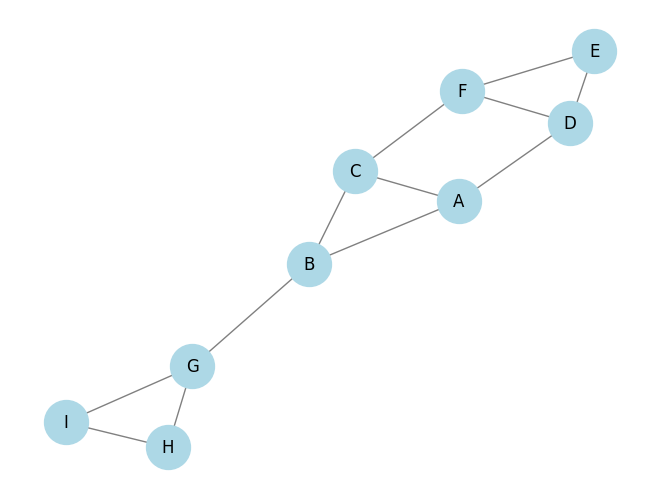

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# same graph as before
G = nx.Graph()
G.add_edges_from([
    ("A", "B"), ("B", "C"), ("C", "A"),
    ("D", "E"), ("E", "F"), ("F", "D"),
    ("G", "H"), ("H", "I"), ("I", "G"),
    ("A", "D"), ("C", "F"), ("B", "G"),
])

nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=1000, font_size=12)

plt.show()

In [ ]:
# Find a shortest path from I to E
# Uses an algorithm called Breadth-First Search
print(nx.shortest_path(G, source="I", target="E"))
print(nx.shortest_path_length(G, source="I", target="E"))

In [ ]:
# Find ALL shortest paths from I to E
paths = list(nx.all_shortest_paths(G, source="I", target="E"))
print(paths)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# What if all edges don't have the same weight?
G.add_edges_from([
    ("A", "B", {"weight": 2}),
    ("B", "C", {"weight": 5}),
    ("C", "A", {"weight": 3}),
    ("D", "E", {"weight": 4}),
    ("E", "F", {"weight": 1}),
    ("F", "D", {"weight": 2}),
    ("G", "H", {"weight": 2}),
    ("H", "I", {"weight": 3}),
    ("I", "G", {"weight": 6}),
    ("A", "D", {"weight": 6}),
    ("C", "F", {"weight": 2}),
    ("B", "G", {"weight": 5}),
])

nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=1000, font_size=12)
# nx.draw(G, pos=nx.kamada_kawai_layout(G), with_labels=True, node_color="lightblue", edge_color="gray", node_size=1000, font_size=12)
plt.show()


In [ ]:
# Find a shortest path from I to E with weights
# Uses an algorithm called Dijkstra's Algorithm
print(nx.shortest_path(G, source="I", target="E", weight='weight'))
print(nx.shortest_path_length(G, source="I", target="E",  weight='weight'))

In [ ]:
G.remove_edge("G", "B")

nx.draw(G, with_labels=True, pos=nx.circular_layout(G) ,node_color="lightblue", edge_color="gray", node_size=1000, font_size=12)

plt.show()


In [ ]:
nx.shortest_path(G, source="I", target="E", weight="weight")

In [ ]:
components = list(nx.connected_components(G))
print(components)

In [ ]:
print("Path from I to E:", nx.has_path(G, "I", "E"))
print("Is connected:", nx.is_connected(G))

### The Travelling Salesman

How can we find *a* shortest path to reach all houses?

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([
    ("A", "B"), ("B", "C"), ("C", "A"),
    ("D", "E"), ("E", "F"), ("F", "D"),
    ("G", "H"), ("H", "I"), ("I", "G"),
    ("A", "D"), ("C", "F"), ("B", "G"),
])

nx.draw(G, with_labels=True, node_color="lightblue", edge_color="gray", node_size=1000, font_size=12)

plt.show()

In [ ]:
print(list(nx.connected_components(G)))
print("Is connected:", nx.is_connected(G))

In [2]:
from networkx.algorithms import approximation
# https://en.wikipedia.org/wiki/Christofides_algorithm
# Uses Christofides algorithm:
# a) creates a minimum spanning tree
# b) look for nodes with odd degree and pair up to minimize weights
# c) find a Eulerian cycle (every edge is passed through once)
# d) convert to a Hamiltonian cycle (every node is passed trough once)
path = approximation.traveling_salesman_problem(G, cycle=True)
print(path)


['G', 'I', 'H', 'G', 'B', 'A', 'D', 'E', 'F', 'C']


In [4]:
from networkx.algorithms import approximation
path = approximation.traveling_salesman_problem(G, cycle=False)
print(path)

['A', 'D', 'E', 'F', 'C', 'B', 'G', 'I', 'H', 'G', 'B', 'A']


In [3]:
from networkx.algorithms import approximation as approx
# We can use Greedy: Pick a node --> go to next closest node
path = approx.traveling_salesman_problem(G, cycle=False, method=approx.greedy_tsp)
print(path)

['C', 'F', 'D', 'E', 'D', 'A', 'B', 'G', 'H', 'I']



## Directed Graphs

A directed graph has arrows showing the direction of the relationship.  
Example: Twitter follows (Alice follows Bob doesn’t mean Bob follows Alice).


In [ ]:

DG = nx.DiGraph()
DG.add_edges_from([("Alice", "Bob"), ("Alice", "Charlie"), ("Charlie", "Alice")])

plt.figure(figsize=(5,5))
nx.draw(DG, with_labels=True, pos=nx.circular_layout(DG), node_color="lightgreen", node_size=2000, font_size=12, arrows=True)
plt.show()

print("In-degree (followers):", dict(DG.in_degree()))
print("Out-degree (following):", dict(DG.out_degree()))


### Breadth-First Search (BFS) vs Depth-First Search (DFS)

Two types of search algorithms

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([
    ("A", "B"), ("B", "C"), ("C", "F"),
    ("D", "E"), ("E", "F"), ("F", "D"),
    ("G", "H"), ("I", "G"), ("H", "C"),
    ("B", "G"), ("C", "E"), ("D", "H"),
    ("B", "E"), ("G", "F"), ("I", "A")
])

# Build BFS and DFS trees starting from 'A'

# BFS: Visits all neighbors first, then neighbors of neighbors, and so on
bfs_T = nx.bfs_tree(G, source="A")

# DFS: Explores as far as possible down one branch before backtracking
dfs_T = nx.dfs_tree(G, source="A")

# We'll set the positioning now so all graphs have the same node locations
pos = nx.kamada_kawai_layout(G, scale=3)  # increase scale for more spread

plt.figure(figsize=(18, 6))

# Original graph
plt.subplot(1, 3, 1)
nx.draw(G, pos, with_labels=True, node_color="coral",
        node_size=800, edge_color="gray")
plt.title("Original Graph")

# BFS tree
plt.subplot(1, 3, 2)
nx.draw(bfs_T, pos, with_labels=True, node_color="lightblue",
        node_size=800, arrows=True, edge_color="gray")
plt.title("BFS Tree from A")

# DFS tree
plt.subplot(1, 3, 3)
nx.draw(dfs_T, pos, with_labels=True, node_color="lightgreen",
        node_size=800, arrows=True, edge_color="gray")
plt.title("DFS Tree from A")

plt.show()



## Clusters, Cliques, and Communities


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_edges_from([
    ("Alice", "Bob"), ("Alice", "Charlie"), ("Bob", "Charlie"), ("Alice", "David"), ("Bob", "David"),
    ("Eve", "Frank"), ("Eve", "Grace"), ("Frank", "Grace"), ("Grace", "Heidi"),
    ("Ivan", "Judy"), ("Ivan", "Karl"), ("Judy", "Karl"), ("Karl", "Leo"),
    ("David", "Eve")
])

nx.draw(G, pos=nx.circular_layout(G), with_labels=True, node_color="lightblue", node_size=1200)
plt.show()




In [ ]:
# Compute clustering coefficient for each node
# Clustering coefficients quantifies how “connected” a node’s neighbors are
clustering = nx.clustering(G)

print("Clustering coefficients:")
for node, coeff in clustering.items():
    print(f"{node}: {coeff:.2f}")

# Average clustering coefficient
avg_clustering = nx.average_clustering(G)
print(f"Average clustering: {avg_clustering:.2f}")


In [ ]:
# A clique is a set of nodes where every node is directly connected to every other node
cliques = list(nx.find_cliques(G))
print("Cliques:")
for clique in cliques:
    print(clique)


In [ ]:
# A community is a group of nodes that are more densely
# connected internally than with the rest of the graph.
from networkx.algorithms.community import greedy_modularity_communities


# greedy_modularity_communities detects communities
# communities are formed by a concentration of edges
communities = list(greedy_modularity_communities(G))
print(communities)



In [ ]:
# Let's make that look a little cleaner
for community in communities:
    print(list(community))

In [ ]:
'''plt.figure(figsize=(10,8))
pos = nx.kamada_kawai_layout(G)
i = 0
colors = ["lightblue", "lightgreen", "lightcoral"]
for community in communities:
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=colors[i % len(colors)], node_size=2000)
    i=i+1

nx.draw_networkx_edges(G, pos, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("School Social Network with Communities")
plt.show()'''

In [ ]:
plt.figure(figsize=(10,8))
pos = nx.kamada_kawai_layout(G)

colors = ["lightblue", "lightgreen", "lightcoral"]
for i, community in enumerate(communities):
    nx.draw_networkx_nodes(G, pos, nodelist=community, node_color=colors[i % len(colors)], node_size=2000)

nx.draw_networkx_edges(G, pos, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("School Social Network with Communities")
plt.show()


In [ ]:
from networkx.algorithms import approximation
plt.figure(figsize=(18,6))
for i, community in enumerate(communities):
    subG = G.subgraph(community)
    plt.subplot(1,len(communities),i+1)
    nx.draw(subG, with_labels=True, node_color="lightblue", node_size=2000)
    plt.title(f"Community {i+1}")



In [ ]:
# Let's workk to highlight a shortest path through all nodes

# First, we will break each community into their own subgraph
plt.figure(figsize=(18, 6))

for i, community in enumerate(communities):
    subG = G.subgraph(community)
    plt.subplot(1, len(communities), i+1)
    pos = nx.spring_layout(subG)
    nx.draw(subG, pos, with_labels=True, node_color="lightblue", node_size=2000)


In [ ]:
# Then, identify a traveling salesman path
for i, community in enumerate(communities):
    subG = G.subgraph(community)
    path = approximation.traveling_salesman_problem(subG, cycle=False)
    print(path)


In [ ]:
# Next, we will identify edges along this path

for i, community in enumerate(communities):
  subG = G.subgraph(community)
  path = approximation.traveling_salesman_problem(subG, cycle=False)
  print(path)

  # Build path edges (pairwise along path)
  path_edges = list(zip(path[:-1], path[1:]))
  print(path_edges)

In [ ]:
# Finally, we draw in these edges on top of each subgraph

from networkx.algorithms import approximation
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))

for i, community in enumerate(communities):
    subG = G.subgraph(community)
    path = approximation.traveling_salesman_problem(subG, cycle=False)
    plt.subplot(1, len(communities), i+1)
    pos = nx.spring_layout(subG)
    nx.draw(subG, pos, with_labels=True, node_color="lightblue", node_size=2000)

    # Build path edges (pairwise along path)
    path_edges = list(zip(path[:-1], path[1:]))
    print(path_edges)

    # Highlight path edges in red
    nx.draw_networkx_edges(subG, pos, edgelist=path_edges, edge_color="red", width=3)

    plt.title(f"Community {i+1}")

plt.show()
